In [1]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use('ggplot')

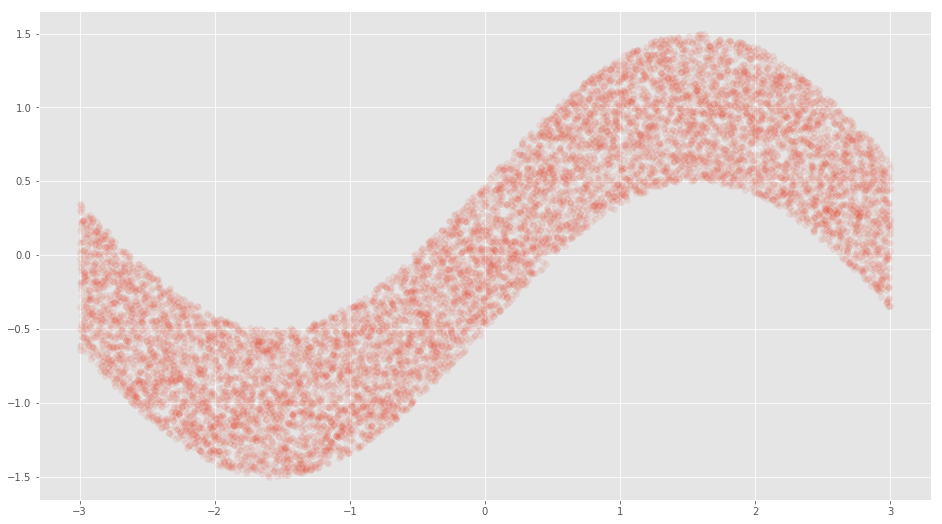

In [2]:
n = 10000
xs = np.linspace(-3, 3, n)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n)
plt.scatter(xs, ys, alpha = 0.1);

In [3]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

W = tf.Variable(
    tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = 'W')
b = tf.Variable(tf.constant([1], dtype = tf.float32), name = 'b')
preds = X * W + b

In [4]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [5]:
# cost = distance(preds, tf.sin(X)) # approximated by
cost = distance(preds, Y)

In [6]:
# Using a TF optimizer
cost = tf.reduce_mean(distance(preds, Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)\
    .minimize(cost)

In [9]:
n_iterations = 500

In [10]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        s.run(optimizer, feed_dict = { X: xs, Y: ys })
        training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
        
        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict = { X: xs }, session = s)
            # If not in notebook:
            #ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations)
            #fig.show()
            #plt.draw()
                        
            print('Training cost:', training_cost)
            
        # Quit when training improvement meets threshold
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
            
        prev_training_cost = training_cost            

Training cost: 1.06312
Training cost: 0.991324
Training cost: 0.920996
Training cost: 0.852145
Training cost: 0.784863
Training cost: 0.720052
Training cost: 0.661236
Training cost: 0.610006
Training cost: 0.567573
Training cost: 0.533063
Training cost: 0.505832
Training cost: 0.484278
Training cost: 0.467299
Training cost: 0.453576
Training cost: 0.442864
Training cost: 0.43466
Training cost: 0.428314
Training cost: 0.423445
Training cost: 0.419736
Training cost: 0.416884
Training cost: 0.414803
Training cost: 0.413317
Training cost: 0.412228
Training cost: 0.411441
Training cost: 0.410895
Training cost: 0.410493
Training cost: 0.4102
Training cost: 0.410009
Training cost: 0.409892
Training cost: 0.409812
Training cost: 0.409761
Training cost: 0.409723
Training cost: 0.409696
Training cost: 0.409677


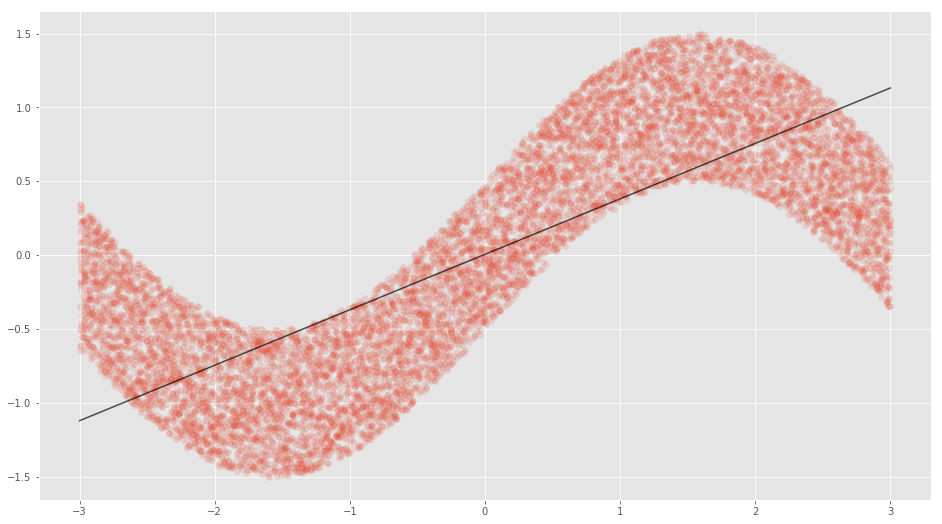

In [11]:
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha = 0.15);
ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations);

## Stochastic and Mini Batch GD

In [14]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size

for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])
    
# BAD IDEA: network will pick up on orderin of data as a signal...
# better to randomize

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [15]:
rand_idxs = np.random.permutation(idxs)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[25 39 96 71 81 87 33 79 65 60]
[85 82 94 47 69  2 53 21 83 41]
[13 74 98 67  8 97 36 91 34 14]
[17 68 45 46  0 70 86 61 19 95]
[76 54 31 50  1  3 77 78 30  4]
[24 63 32 56 62 38 43 55  9 75]
[42 27 52 29 51 90 72 16 84 99]
[28 15 11 40 48 20 58 80 93  6]
[ 5 66 89  7 59 22 57 23 10 73]
[37 92 35 12 44 49 88 18 26 64]


In [23]:
# Incorporate mini-batching into previous:
batch_size = 1000
#fig, ax = plt.subplots(1, 1)
#ax.scatter(xs, ys, alpha=0.15, marker='+')
#ax.set_xlim([-4, 4])
#ax.set_ylim([-2, 2])

with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or 
    # tf.constant_intitializer, then this would have set `W` and `b` to 
    # their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={ X: xs[idxs_i], Y: ys[idxs_i] })

        training_cost = sess.run(cost, feed_dict={ X: xs, Y: ys })

        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict={X: xs}, session=sess)
            #ax.plot(xs, preds, 'k', alpha=it_i / n_iterations)
            print(training_cost)
#fig.show()
#plt.draw()

1.01049
0.488927
0.413661
0.40973
0.409635
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.409631
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.409632
0.409631
0.40963
0.40963
0.409631
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.409631
0.40963
0.40963
0.40963
0.40963
0.40963
0.409631
0.409631
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963
0.40963


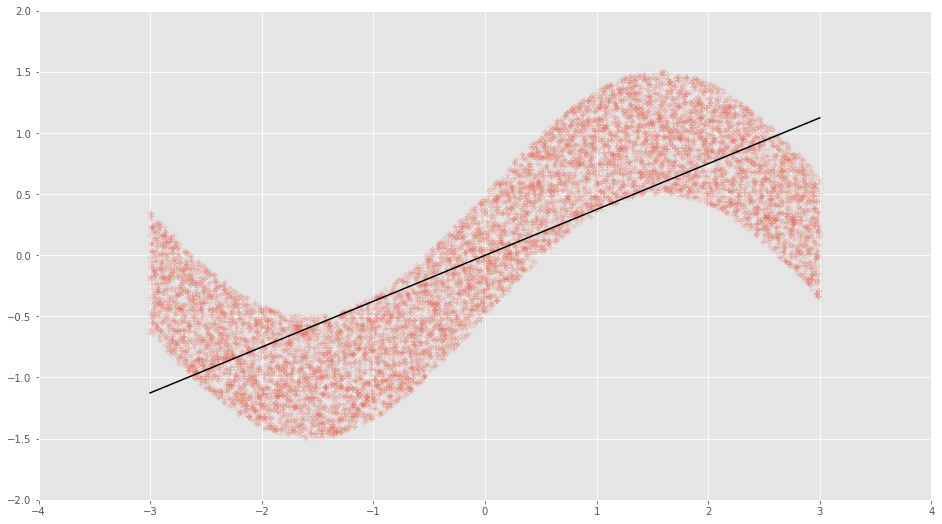

In [26]:
fig, ax = plt.subplots(1, 1);
ax.scatter(xs, ys, alpha=0.15, marker='+');
ax.set_xlim([-4, 4]);
ax.set_ylim([-2, 2]);
ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations);